# <center> Trabajo Semanal 7 <center>
## <center> Autores: Arturo Huber  y Matias Galperin

## Introducción

En este trabajo abordaremos el tema de la transformada Z y la respuesta en frecuencia de distintos sistemas FIR caracterizados por su ecuación en diferencias.

La Transformada Z es una herramienta matemática que permite simplificar el análisis de sistemas lineales invariantes en el tiempo (LTI) en el dominio discreto.  
Para sistemas causales, se define como:

$$
H(z) = \sum_{k=0}^{N} h[n] z^{-n}
$$

Donde:

$z = re^{jw}$ <br> 
$r = |z|$ <br>
$w = Arg(z)$ <br>

Para un sistema que esta definido por una ecuación en diferencias, que tienela siguiente forma:

$$
y(n) = \sum_{k=0}^{M} b_k\,x(n-k) - \sum_{k=0}^{N} a_k\,y(n-k)
$$

al aplicar la Transformada Z, se obtiene la función transferencia:

$$
H(z) = \frac{N(z)}{D(z)} =
\frac{b_0 + b_1 z^{-1} + \dots + b_M z^{-M}}
{a_0 + a_1 z^{-1} + \dots + a_N z^{-N}}
$$

La Transformada Z permite caracterizar el comportamiento del sistema mediante los polos y ceros de 𝐻(𝑧):<br>
* Los *ceros* son los valores de z que anulan el numerador.<br>
* Los *polos* son los valores de 𝑧 que anulan el denominador.

La ubicación de los polos en el plano Z determina la estabilidad del sistema:
* Si todos los polos están dentro del círculo unitario $(∣𝑧∣<1)$, el sistema es estable.
* Si algún polo está sobre o fuera del círculo unidad, el sistema es inestable.

Para calcular la respuesta en frecuencia, evaluamos la transferencia sobre el circulo unitario, es decir  con $ z = e^{jw}$

$$
H(e^{j\omega}) = H(z)\big|_{z = e^{j\omega}}
$$

Se calcula:

- **Módulo:**

$$
|H(e^{j\omega})| =
\sqrt{ \operatorname{Re}\!\left(H(e^{j\omega})\right)^2 +
       \operatorname{Im}\!\left(H(e^{j\omega})\right)^2 }
$$

- **Fase:**

$$
\angle H(e^{j\omega}) =
\arctan\!\left(
\frac{\operatorname{Im}\!\left(H(e^{j\omega})\right)}
     {\operatorname{Re}\!\left(H(e^{j\omega})\right)}
\right)
$$


Con todas estas herramientas podemos analizar sistemas apartir de sus ecuaciones en diferencias facilmente.


## Análisis y Desarrollo

Para las siguientes ecuaciones en diferencias, encontramos las funciones transferencias, graficamos sus polos y ceros y calculamos sus respuestas en frecuencias.
$a)  y(n)=x(n−3)+x(n−2)+x(n−1)+x(n)$<br>
$ b) y(n)=x(n−4)+x(n−3)+x(n−2)+x(n−1)+x(n)$ <br>
$ c)  y(n)=x(n)−x(n−1) $ <br>
$ d)  y(n)=x(n)−x(n−2)$


Funciones transferencia:

$$
T_a(z) = 1 + z^{−1} + z^{−2} + z^{−3} =  \frac{z^3 + z^2 + z + 1}{z^3}
$$
$$
T_b(z) = 1 + z^{−1} + z^{−2} + z^{−3}+ z^{−4} =  \frac{z^4 + z^3 + z^2 + z + 1}{z^4}
$$
$$
T_c(z) = 1 + z^{−1} = \frac{z + 1}{z}
$$
$$
T_d(z) = 1 + z^{−2} = \frac{z^2  + 1}{z^2 }
$$


Como observaciones generales de todas las transferencias podemos ver que las transferencias tienen polos en el origen, por lo que los sistemas son estables. También observamos que tiene los ceros sobre el circulo unitario, estos ceros determinaran nulos en frecuencia, donde la magnitud de la respuesta es cero.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definición de transferencias
T = {
    "T_a": ([1, 1, 1, 1], [1, 0, 0, 0]),          # z^3 + z^2 + z + 1 / z^3
    "T_b": ([1, 1, 1, 1, 1], [1, 0, 0, 0, 0]),    # z^4 + z^3 + z^2 + z + 1 / z^4
    "T_c": ([1, 1], [1, 0]),                      # z + 1 / z
    "T_d": ([1, 0, 1], [1, 0, 0])                 # z^2 + 1 / z^2
}

# Grafco de polos y ceros
def plot_pz(num, den, title):
    z, p, _ = signal.tf2zpk(num, den)
    plt.figure(figsize=(4,4))
    plt.axhline(0, color='0.7')
    plt.axvline(0, color='0.7')
    
    # Círculo unitario
    circle = plt.Circle((0, 0), 1, color='black', fill=False, ls='dotted')
    plt.gca().add_artist(circle)
    
    # Ceros (o) y Polos (x)
    plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='b', label='Ceros')
    plt.scatter(np.real(p), np.imag(p), marker='x', color='r', label='Polos')
    
    plt.title(f"Diagrama de Polos y Ceros - {title}")
    plt.xlabel("Parte real")
    plt.ylabel("Parte imaginaria")
    plt.xlim(-1.25,1.25)
    plt.ylim(-1.25,1.25)
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_freq_response(num, den, title):
    # Calcula la respuesta en frecuencia 
    w, h = signal.freqz(num, den, worN=1024)

    # Magnitud normalizada (en dB)
    mag = 20 * np.log10(np.abs(h) / np.max(np.abs(h)))

    phase = np.unwrap(np.angle(h))

    # --- Gráfico del módulo ---
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(w, mag)
    plt.axhline(y=-3, linestyle='--', color ='black', alpha = 0.7, label='-3 dB')
    plt.title(f"Módulo de {title}")
    plt.xlabel("ω [rad/muestra]")
    plt.ylabel("Magnitud [dB]")
    plt.xlim(0, np.pi)
    plt.legend()                   
    plt.ylim(-60, 5)                     
    plt.grid(True)

    # --- Gráfico de la fase ---
    plt.subplot(1, 2, 2)
    plt.plot(w, phase)
    plt.title(f"Fase de {title}")
    plt.xlabel("ω [rad/muestra]")
    plt.ylabel("Fase [rad]")
    plt.xlim(0, np.pi)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

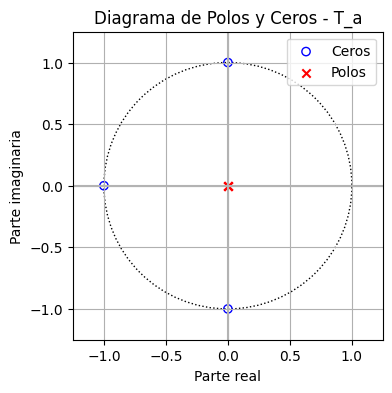

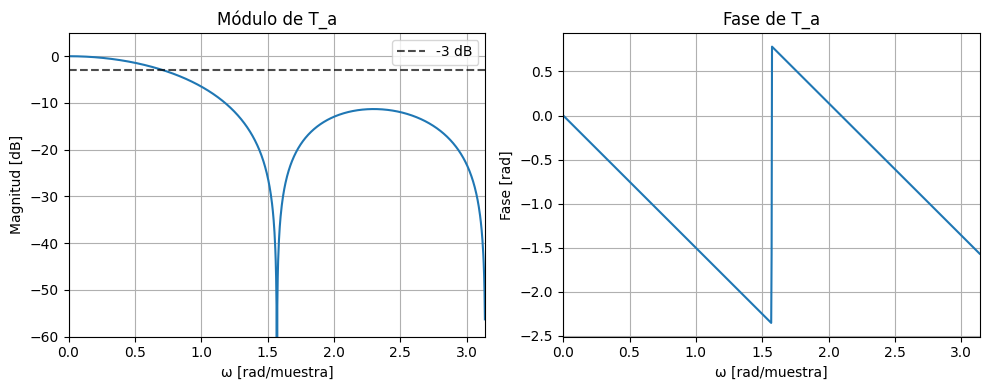

In [33]:
plot_pz(*T["T_a"], "T_a")
plot_freq_response(*T["T_a"], "T_a") # z^3 + z^2 + z + 1 / z^3

Viendo los graficos de la primera transferencia, vemos que se comporta como una pasa bajo. Como referencia cruza los -3dB en aproximadamente $\omega\approx\pi/4$ y gracias al aporte de los ceros muestra nulos en magnitud en $\omega =\pi/2$ y $\omega =\pi$.

En cuanto a la fase, mantiene una fase lineal, es decir retardo constante, salvo en $\omega = \pi/2$, donde se anula en magnitud, que sufre un salto de $\pi$, que se  puede interpetrar como un cambio de signo en la salida.

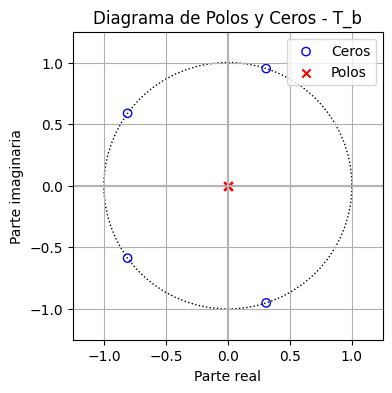

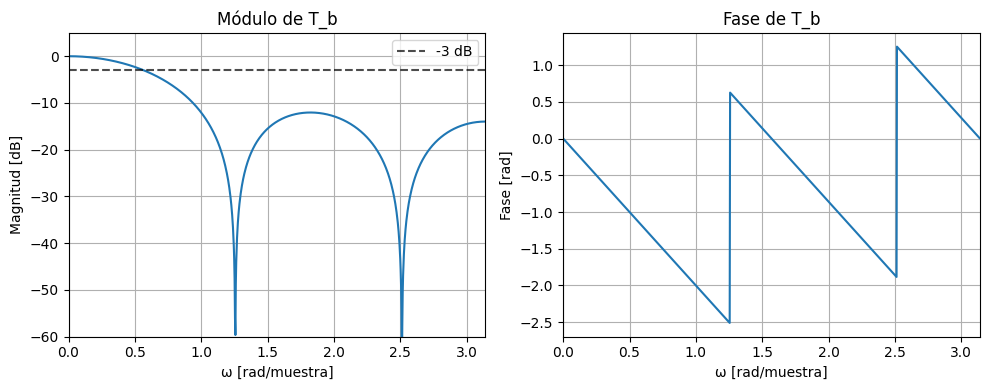

In [34]:
plot_pz(*T["T_b"], "T_b")
plot_freq_response(*T["T_b"], "T_b") # z^4 + z^3 + z^2 + z + 1 / z^4

Con respecto a $T_b$, también vemos un comportamiento pasa bajo, similar a $T_a$, pero con la diferencia fundamentela de contar con un cero más en el circulo unitario. Al tener un nulo en frecuencia mas cerca del origen observamos una transición mas rápida, cruzando los -3dB en aproximadamente $ \omega\approx  0.5$,  ($0.5 < \pi/4$).

En consecuencia, su frecuencia de corte es menor, reforzando su comportamiento pasa-bajo. Al aumentar el número de ceros sobre el círculo unitario genera también una mayor cantidad de nulos.

Estos nulos en la respuesta en frecuencia, se traducen como saltos de en $\pi$ en la fase. Observamos que presenta una fase lineal con saltos donde se anula la transferencia.

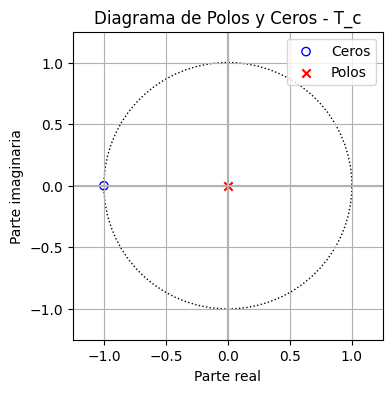

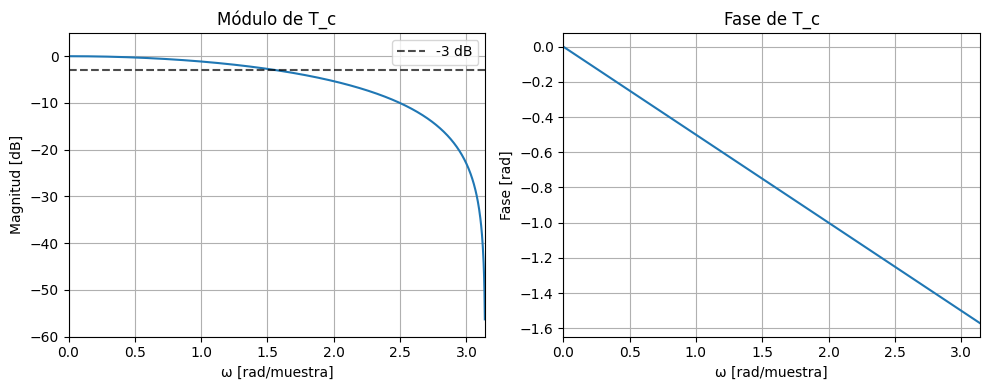

In [35]:
plot_pz(*T["T_c"], "T_c")
plot_freq_response(*T["T_c"], "T_c") # z + 1 / z

Con respecto a $T_c$, que también presenta comportamiento pasa-bajo, vemos una transición mucho más lenta, al tener un solo cero en $\omega = \pi$.

Con respecto a la fase, presenta una fase totalmente lineal, con un retardo en grupo constante para todas las frecuencias, por lo que este sistema no deberia tener ninguna distorción de fase.

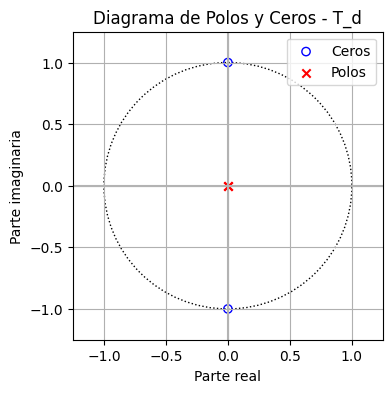

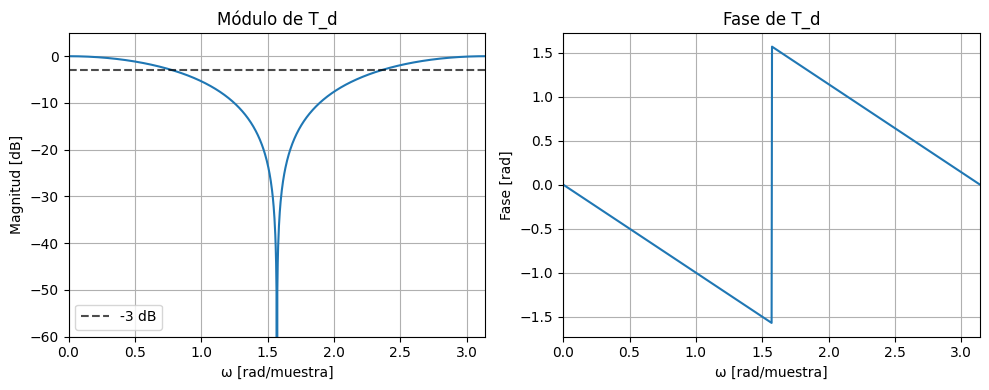

In [36]:
plot_pz(*T["T_d"], "T_d")
plot_freq_response(*T["T_d"], "T_d") # z^2 + 1 / z^2

Viendo la última transferencia, $T_d$, vemos un comportamiento elimina-banda o filtro notch, donde una banda de frecuencias del medio del ancho de banda son atenuadas. Este comportamiento se debe al posicionamiento de los ceros en $\omega = \pi/2$ y $\omega = 3\pi/2$ que generan una atenuación maxima, y unica, en $\omega = \pi/2$, lo genera el comportamiento elimina-banda.

Con respecto a la fase, como vimos en los casos anteriores, tiene un comportamiento lineal, salvo donde hay un nulo en la respuesta en frecuencia que genera un salto en $\pi$.

## Conclusiones

Como vimos en los casos particulares, el comportamiento observado en las respuestas en frecuencia puede explicarse a partir de las propiedades fundamentales de la Transformada-$Z$ y de los sistemas lineales e invariantes en el tiempo (LTI). En particular, la ubicación de los polos y ceros determina completamente la forma de la respuesta en frecuencia y, por ende, las características de filtrado del sistema.

En los sistemas de tipo FIR, los polos se encuentran en el origen, lo que garantiza estabilidad y una respuesta de fase típicamente lineal. Los ceros, en cambio, son los responsables de modelar las atenuaciones o cancelaciones en determinadas frecuencias. Cuando los ceros se ubican sobre el círculo unitario, generan nulos exactos en la respuesta en frecuencia; si se alejan de él, producen atenuaciones progresivas. Este fenómeno se debe a la relación directa entre el ángulo de cada cero y la frecuencia en la cual el espectro de magnitud se anula.

Por otro lado, la fase de la respuesta en frecuencia refleja el retardo temporal introducido por el sistema. En los filtros FIR con coeficientes simétricos, la fase es lineal, indicando un retardo de grupo constante y ausencia de distorsión de fase. Los saltos de $\pi$ observados se corresponden con las frecuencias donde la magnitud se anula. Estos saltos de $\pi$ pueden interpretarse como un cambio de signo en la salida.

En síntesis, el análisis de un sistema LIT mediante la transformada $Z$, y la evaluación sobre la ubicación de los polos y ceros nos permite caracterizar el sistema y su respuesta en frecuencia facilmente.
